In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir
import pandas as pd

In [2]:
select = pd.read_pickle(PROCESSED_DIR / 'starling_zenodo_2019_revised.pickle')

In [3]:
select

,wavs,bID,tmf
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,18.110849
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,17.681803
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,23.377868
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,59.613643
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,-10.628535
...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,58.918929
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.320992
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.872074
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.766811


In [4]:
bID = []
for index, row in select.iterrows():
    bID.append(str(row['wavs']).split('/')[-3])
    
select['bID'] = bID

In [5]:
select

,wavs,bID,tmf
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,18.110849
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,17.681803
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,23.377868
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,59.613643
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-10.628535
...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,58.918929
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.320992
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.872074
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.766811


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn

In [150]:
colors = []
sigs = []

## for every color
for beta, color in zip([0], ['white']):
    ## generate 100
    for n in np.arange(0, 100):
        samples = 1200000 # number of samples to generate
        sigs.append(cn.powerlaw_psd_gaussian(beta, samples))
        colors.append(color)

In [151]:
noises = pd.DataFrame(
    {
        'colors' : colors,
        'sigs' : sigs
    }
)

In [152]:
noises

,colors,sigs
0,white,"[0.16853069611919716, -0.324605364685988, -0.0..."
1,white,"[-2.713574391523644, -1.689336867597137, -0.69..."
2,white,"[0.6797606494595935, 1.7946192570854116, -0.22..."
3,white,"[0.05692955192465808, -0.5073822231511981, -1...."
4,white,"[1.3224663456560846, 0.4365035505991558, -1.75..."
...,...,...
95,white,"[-0.44802271597407284, 0.7357764760354587, -1...."
96,white,"[-1.7319125793350203, 0.14965791451123706, -1...."
97,white,"[-1.0395652004688507, 0.07197119935223435, 0.1..."
98,white,"[-0.8865307853945764, -0.36220854961117693, -0..."


In [10]:
select['type'] = 'starling'

In [11]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

/tmp/ipykernel_43688/123448108.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [12]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [13]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True,
            reduce_noise = False
        )
        for address in tqdm(noises['sigs'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


In [14]:
noise_df = pd.DataFrame(
    {'tmf':tmfs}
)

In [15]:
noise_df['bID'] = 'white'
noise_df['type'] = 'white noise'

In [16]:
select

,wavs,bID,tmf,type
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,18.110849,starling
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,17.681803,starling
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,23.377868,starling
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,59.613643,starling
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-10.628535,starling
...,...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,58.918929,starling
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.320992,starling
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.872074,starling
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.766811,starling


In [17]:
select['bID'] = bID

In [50]:
freq = []
sines = []
for i in tqdm(np.arange(1, 101)):
    start_time = 0
    end_time = 60
    sample_rate = 48000
    time = np.arange(start_time, end_time, 1/sample_rate)
    theta = 0
    frequency = 100 * i
    freq.append(frequency)
    amplitude = 1
    sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
    sines.append(sinewave)

100%|██████████| 100/100 [00:12<00:00,  8.09it/s]


In [51]:
sines = pd.DataFrame(
    {
        'freq' : freq,
        'sine' : sines
    }
)

In [52]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    sine_tmf = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True,
            reduce_noise = False
        )
        for address in tqdm(sines['sine'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


In [87]:
from starling_rhythm.utils.audio import extract_amp_env
from scipy.io.wavfile import read
from pathlib2 import Path

In [160]:
emp_ae = extract_amp_env(read(select['wavs'].values[1])[1], target_sr = 200, reduce_noise = True)
wn_ae = extract_amp_env(noises['sigs'].values[1], target_sr = 200, reduce_noise = False)

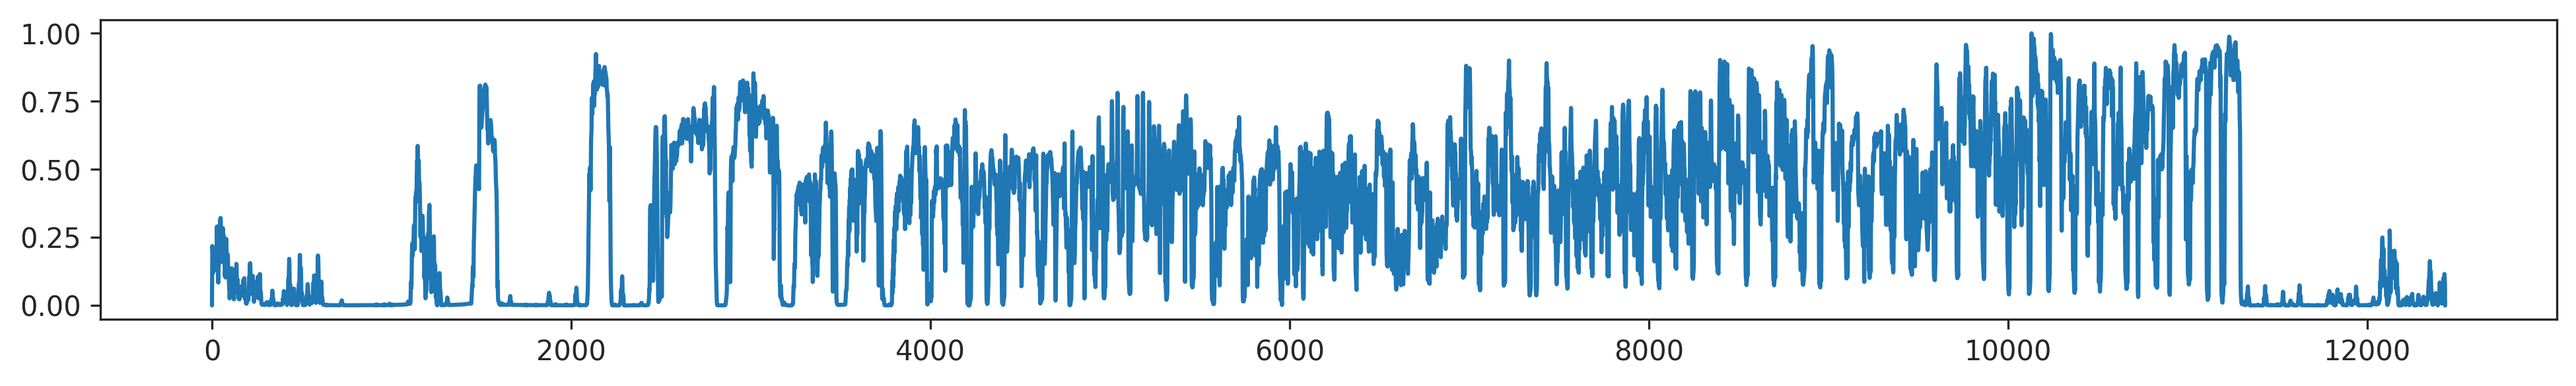

In [161]:
figure(figsize = (16, 2), dpi = 300)
plt.plot(emp_ae)

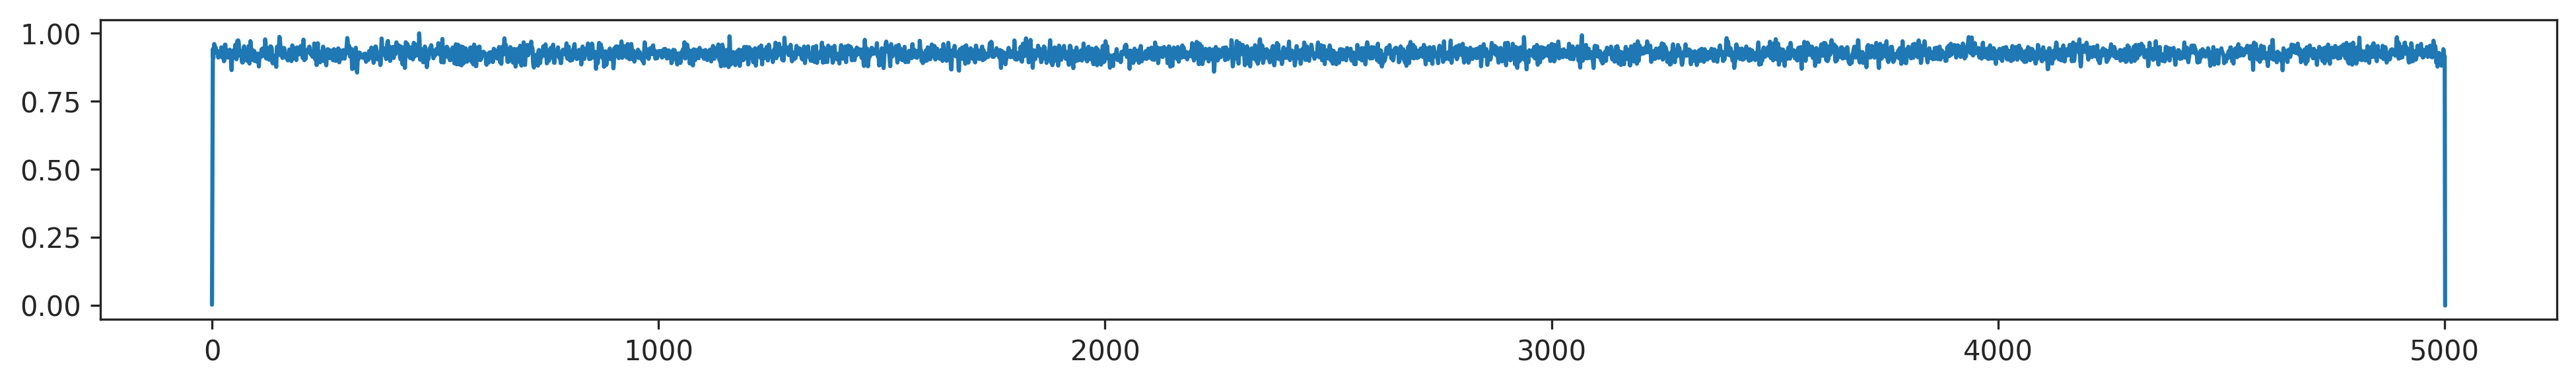

In [162]:
figure(figsize = (16, 2), dpi = 300)
plt.plot(wn_ae)

In [163]:
def mc_cumsum(x):
    container = []
    new_x = x - np.mean(x)
    for index, num in zip(np.arange(0, len(x)), x):
        container.append(np.sum(new_x[0:index]))
        
    return container

In [164]:
np.mean(emp_ae)

0.34781145865193974

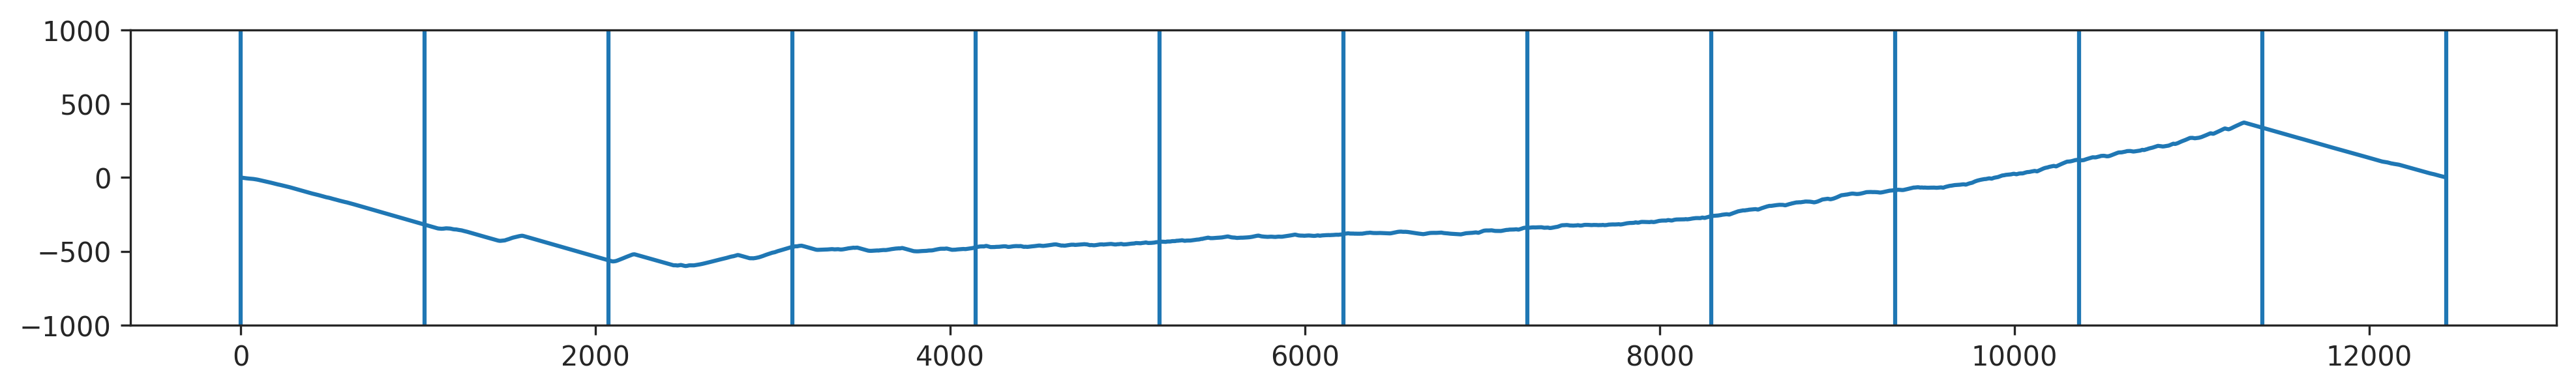

In [183]:
figure(figsize = (16, 2), dpi = 300)
plt.plot(mc_cumsum(emp_ae))
plt.ylim((-1000,1000))
for x in np.linspace(0, len(emp_ae), 13):
    plt.axvline(x)

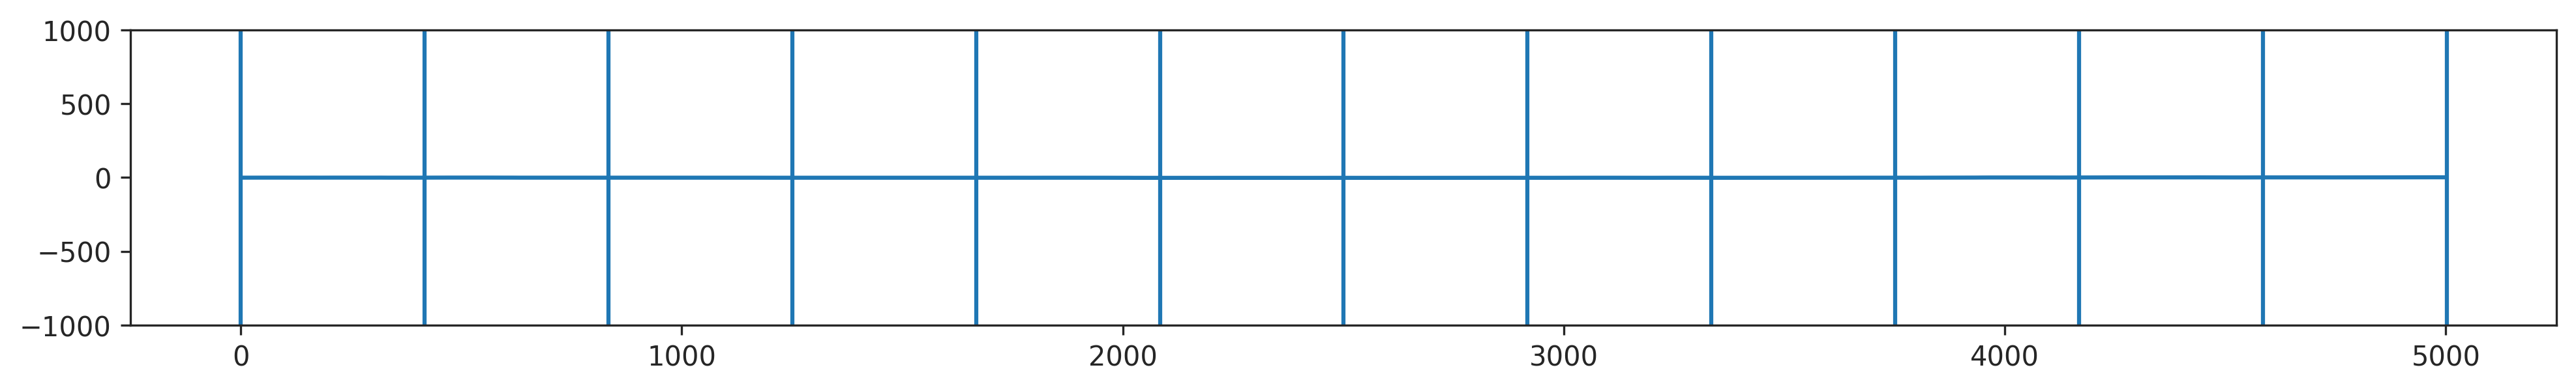

In [185]:
figure(figsize = (16, 2), dpi = 300)
plt.plot(mc_cumsum(wn_ae))
plt.ylim((-1000,1000))
for x in np.linspace(0, len(wn_ae), 13):
    plt.axvline(x)

In [225]:
from starling_rhythm.iaaft import surrogates

In [229]:
emp_sur = surrogates(emp_ae, ns = 1)
wn_sur = surrogates(wn_ae, ns = 1)

In [194]:
from MFDFA import MFDFA

In [195]:
def time_windows(amp_env, num = 50):
    '''
    Takes amplitude envelope and create log-scaled time windows from 1ms to full length of the song
    '''
    
    lag = np.unique(np.geomspace(1, len(amp_env), num = num).astype(int))
    
    return lag

In [222]:
def hurst_expo(
    amp_env, 
    time_window_cnt = 50, 
    q_min = 0.5, 
    q_max = 5, 
    q_num = 10
):
    '''
    Save MF-DFA values
    '''
    
    ## retrieve time windows
    lag = time_windows(amp_env, num = time_window_cnt)
    
    ## q_range
    q_range = np.linspace(q_min, q_max, q_num)
    
    ## Prep containers
    h_expo = []
    qs = []
    lags = []
    dfas = []
    
    plt.rcParams["figure.figsize"] = (16,2)
    
    # MFDFA
    ## For each q, generate its dfa points and estimate the hurst exponent
    for q in q_range:
        lag, dfa = MFDFA(timeseries = amp_env, lag = lag, q = q, order = 1) ## linear detrend
        h_expo.append(np.polyfit(np.log(lag), np.log(dfa), 1)[0][0])
        plt.loglog(lag, dfa, 'o', label = str(q))
    
    plt.legend()
    plt.xlabel('Time Window Size: s')
    plt.ylabel('Fluctuation function: F_q(s)')
    plt.ylim(0, 1000)
    
    return h_expo

/tmp/ipykernel_43688/1041363252.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1000)


[1.1718495468831698,
 1.1288480568049295,
 1.1045819928584855,
 1.0871628625493917,
 1.0730680003969513,
 1.0609750513681655,
 1.0503136492434086,
 1.0407928178982133,
 1.0322323199797712,
 1.0245013570548387]

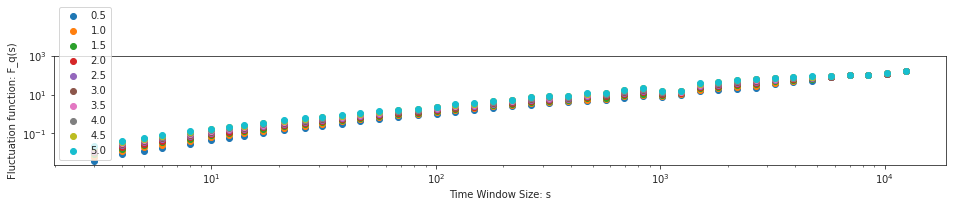

In [223]:
hurst_expo(emp_ae)

/tmp/ipykernel_43688/1041363252.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1000)


[1.1598565429716134,
 1.1260058135542643,
 1.1039788242257402,
 1.087585162062479,
 1.0745442617501417,
 1.0637965915250953,
 1.054742489642184,
 1.0469922880804432,
 1.0402701287084644,
 1.034371081287006]

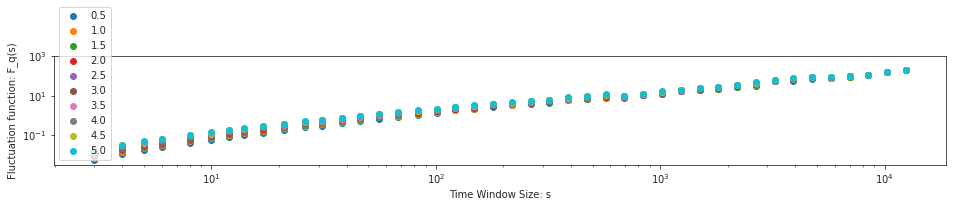

In [228]:
hurst_expo(emp_sur[0])

/tmp/ipykernel_43688/1041363252.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1000)


[0.6426113304120408,
 0.625975186202368,
 0.5998924946897809,
 0.5555606981155005,
 0.499082560854735,
 0.4455475444768493,
 0.4014653324312763,
 0.3665994654710938,
 0.3389915341330266,
 0.3168088882140854]

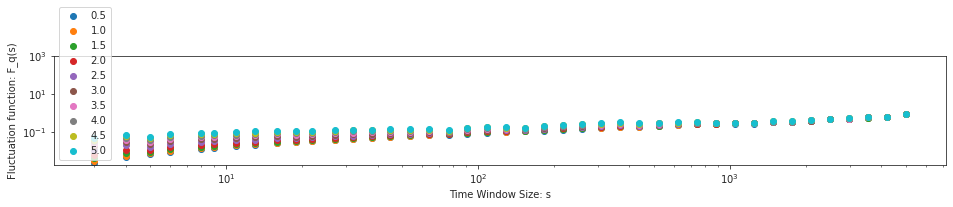

In [230]:
hurst_expo(wn_sur[0])

/tmp/ipykernel_43688/1041363252.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1000)


[0.5923808756335681,
 0.5827045545100745,
 0.5707979771553799,
 0.5510168192650352,
 0.5187908783557507,
 0.4793842616814291,
 0.44096726745520826,
 0.4070915668228576,
 0.3782172502437257,
 0.35381365553275973]

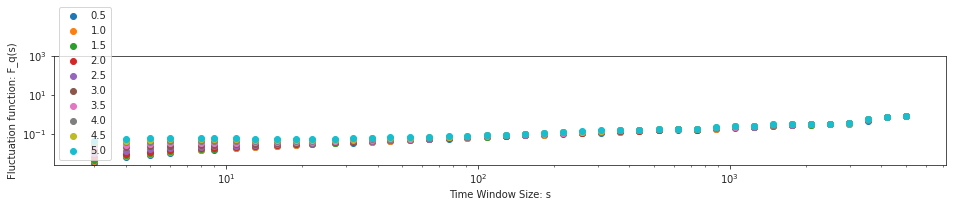

In [224]:
hurst_expo(wn_ae)

In [198]:
sines = pd.DataFrame(
    {
        'tmf' : sine_tmf
    }
)

In [57]:
sines['bID'] = 'sine'
sines['type'] = 'sine'

In [69]:
amal = pd.concat([noise_df, select])

In [70]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [71]:
mean_confidence_interval(sine_tmf)[2]

13.206019075128747

In [72]:
sum(select['tmf'] > mean_confidence_interval(sine_tmf)[2])

5797

In [73]:
sum(select['tmf'] > mean_confidence_interval(sine_tmf)[2])/ len(select)

0.5521478236022478

Text(0.5, 0, 't_MF')

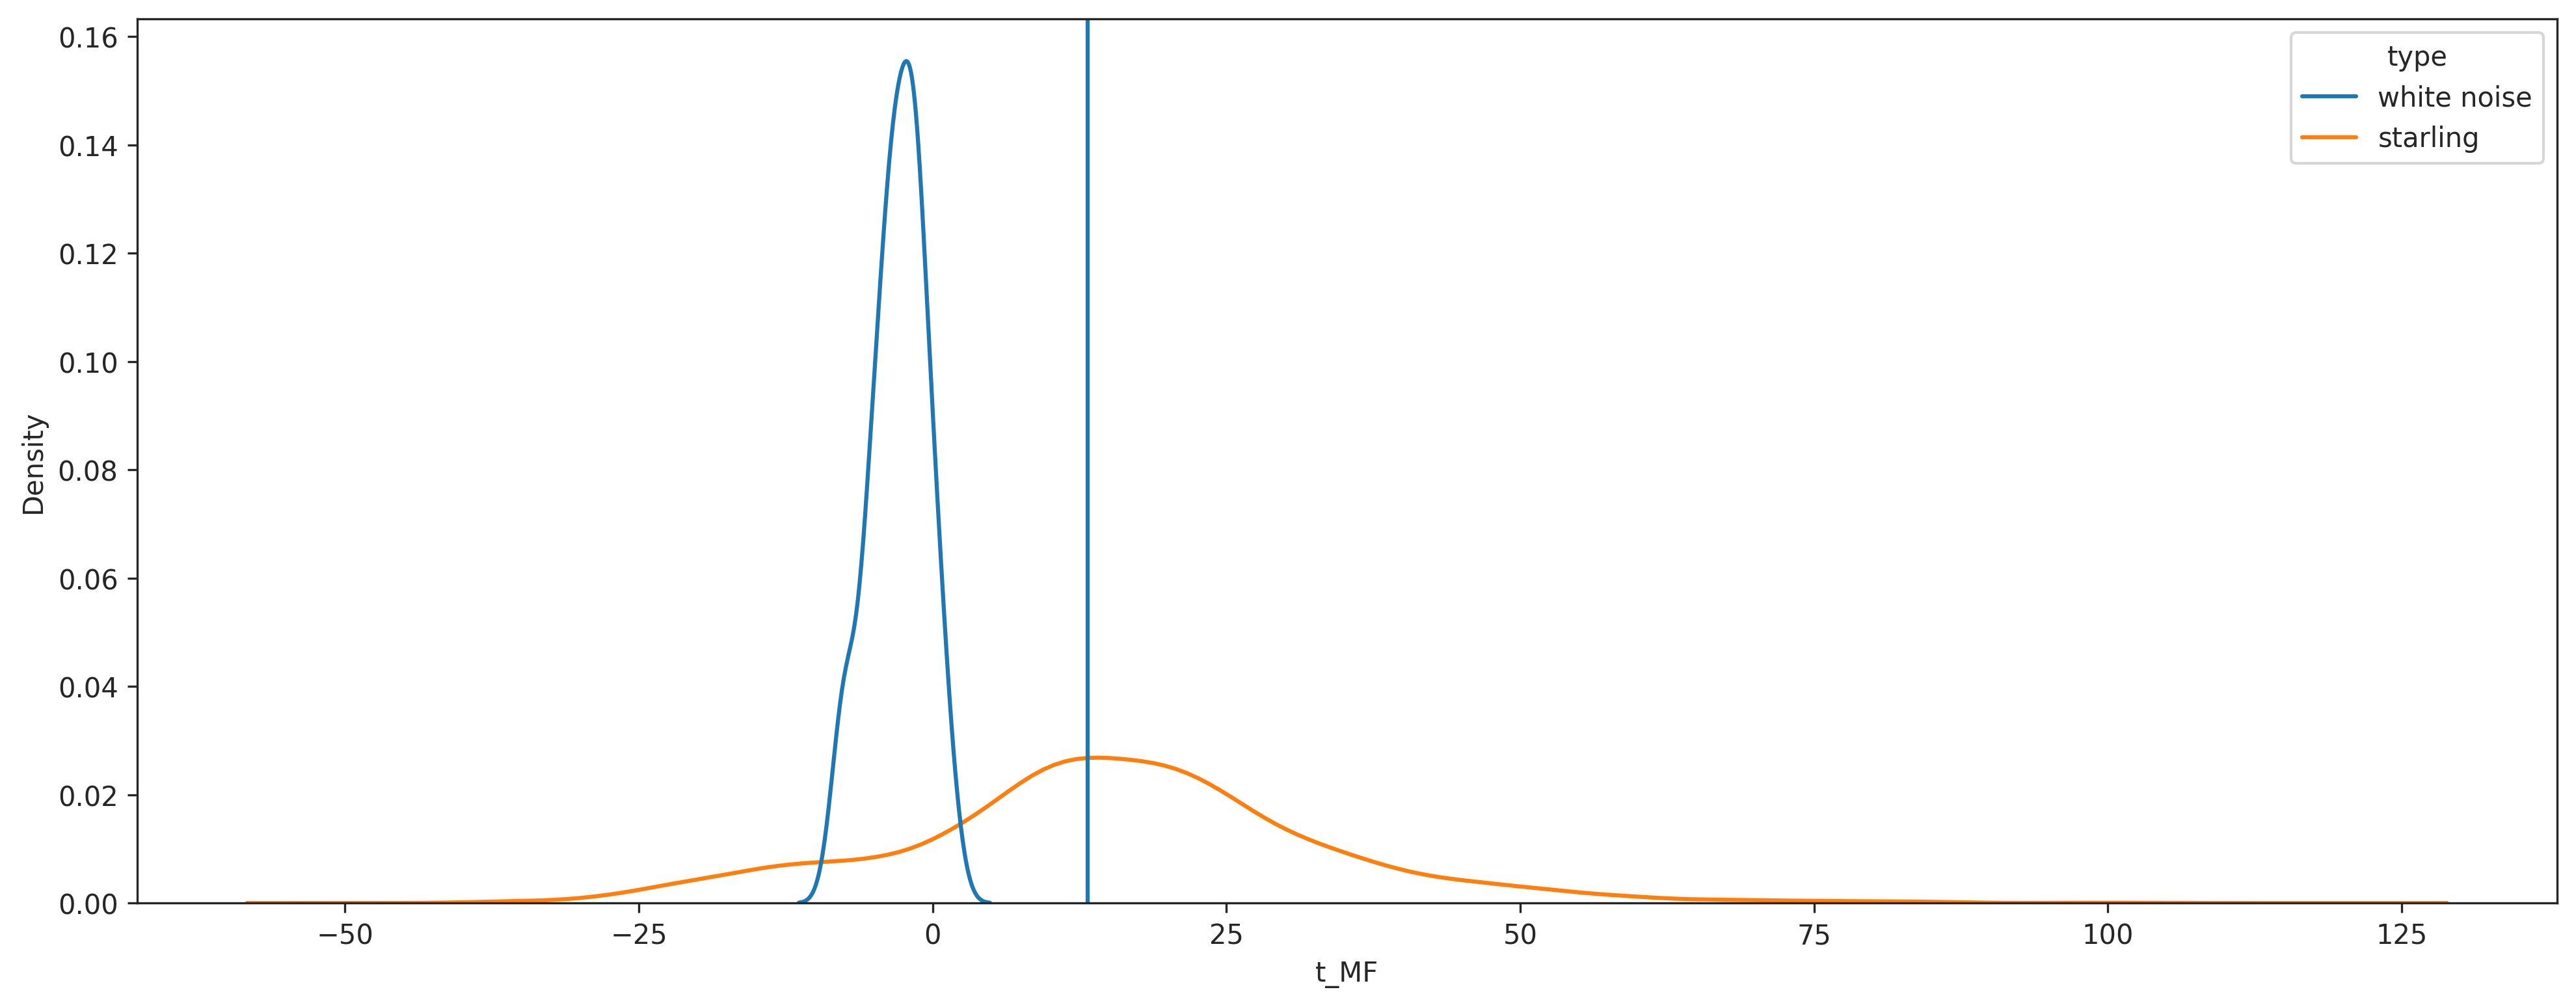

In [74]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')



sns.kdeplot(data = amal.reset_index(), x = 'tmf', color = 'black', hue = 'type', common_norm = False)

plt.axvline(x=mean_confidence_interval(sine_tmf)[2])
plt.xlabel('t_MF')

Text(0.5, 0, 't_MF')

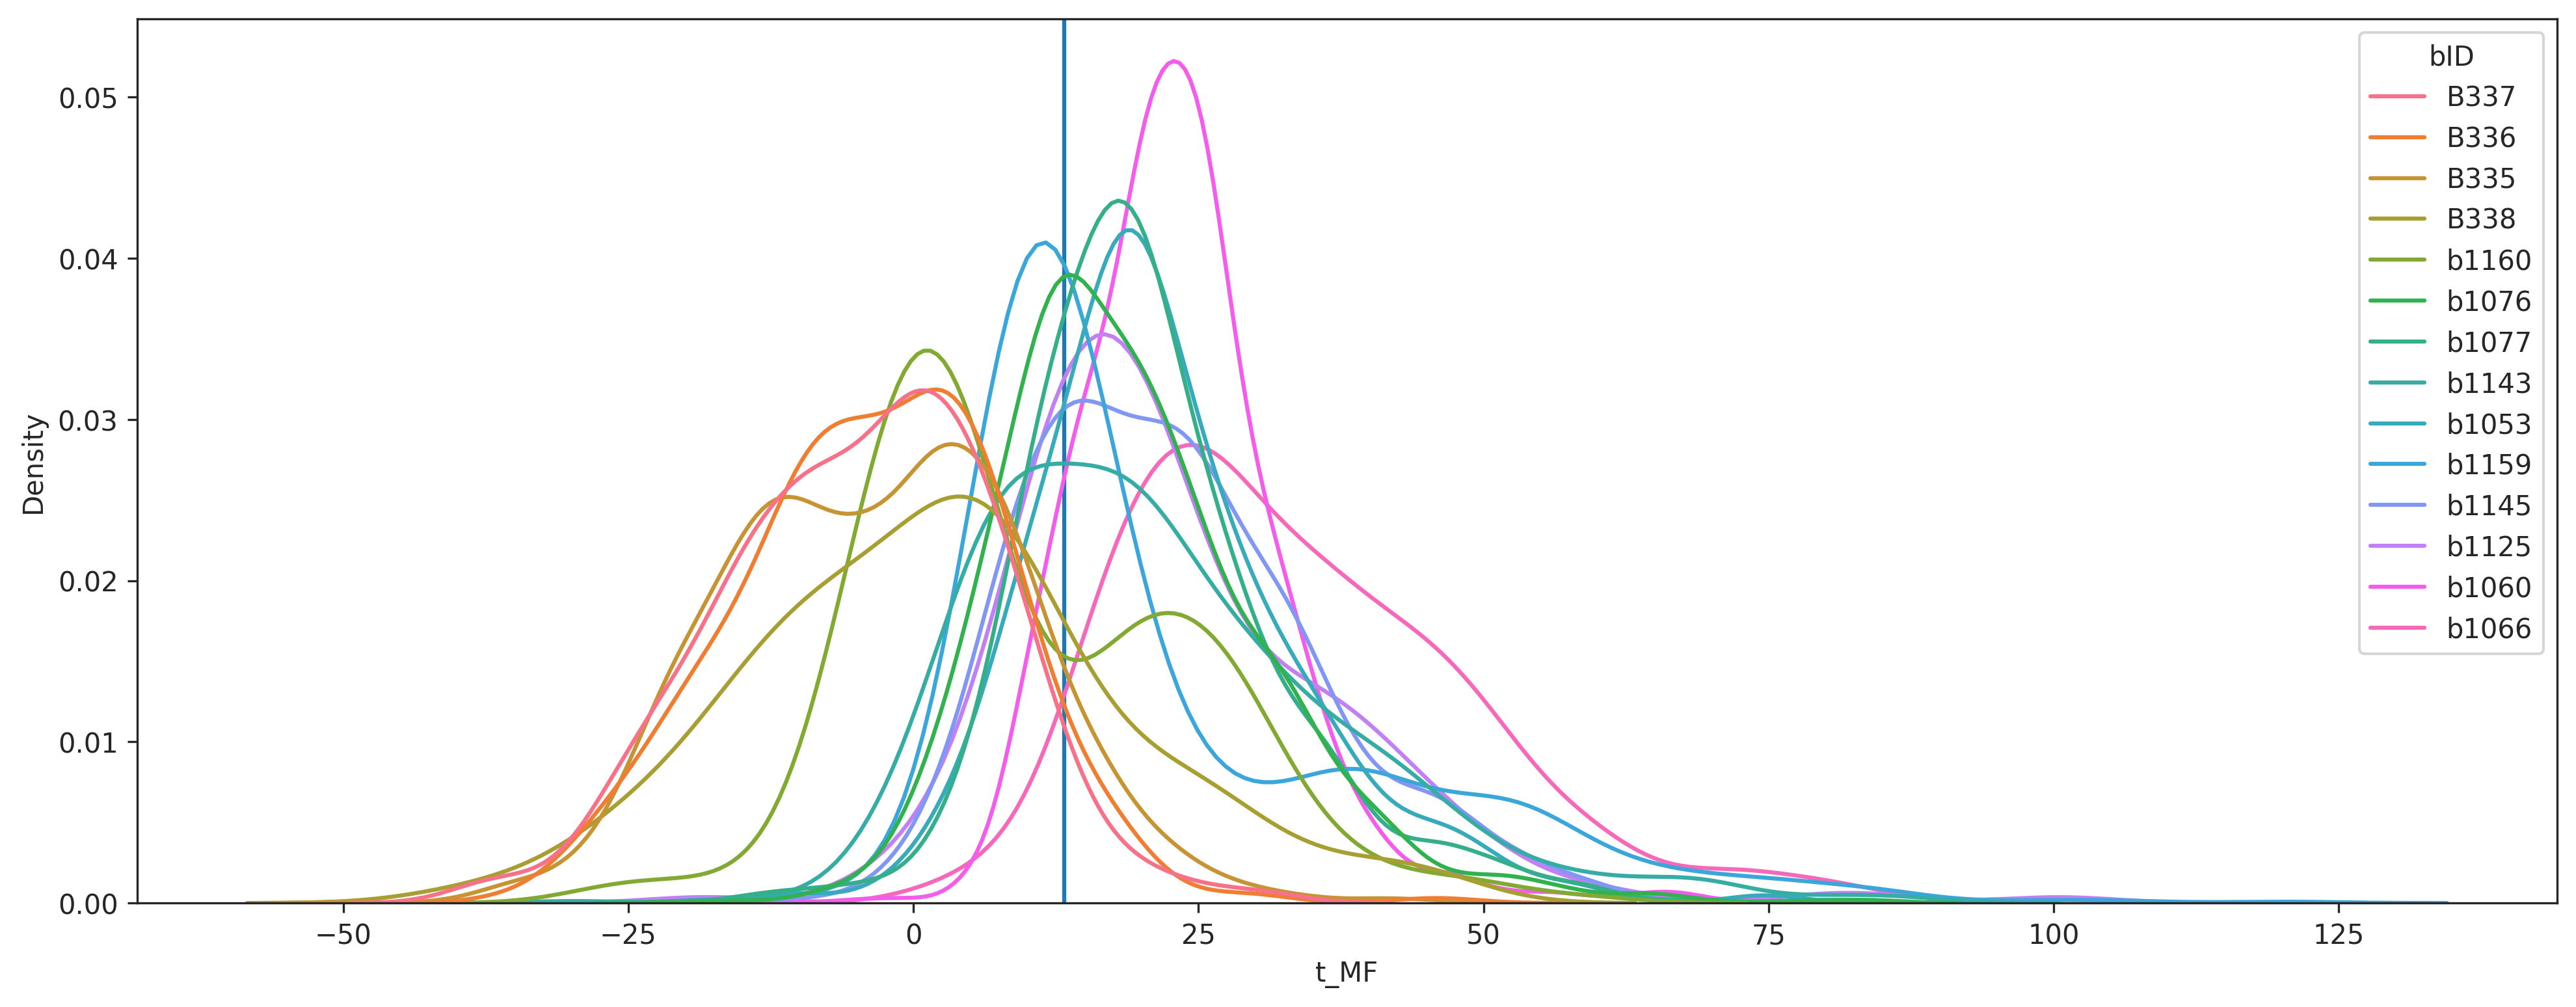

In [75]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

plt.axvline(x=mean_confidence_interval(sine_tmf)[2])
sns.kdeplot(data = select, x = 'tmf', hue = 'bID', color = 'bID', common_norm = False, hue_order = alpha_list)
plt.xlabel('t_MF')

In [65]:
bird_average = []

for bID in np.unique(select['bID'].values):
    subframe = select[select['bID'] == bID]
    bird_average.append([np.mean(subframe['tmf']), bID])

In [66]:
bird_average.sort()
bird_average

[[-4.688214014605427, 'B337'],
 [-3.5862804046235364, 'B336'],
 [-3.1995126455043734, 'B335'],
 [2.0568251059518965, 'B338'],
 [9.888303833160323, 'b1160'],
 [19.13824062896487, 'b1076'],
 [20.84561800590809, 'b1077'],
 [21.444820428159904, 'b1143'],
 [21.945195794787526, 'b1053'],
 [22.331208551466187, 'b1159'],
 [22.409473000236424, 'b1145'],
 [22.731119684037786, 'b1125'],
 [23.363680495686104, 'b1060'],
 [33.490107462238726, 'b1066']]

In [67]:
alpha_list = [ls[1] for ls in bird_average]

In [68]:
alpha_list

['B337',
 'B336',
 'B335',
 'B338',
 'b1160',
 'b1076',
 'b1077',
 'b1143',
 'b1053',
 'b1159',
 'b1145',
 'b1125',
 'b1060',
 'b1066']